In [1]:
import requests
import re

# Define the URL of the SWPC API endpoint
url = "https://services.swpc.noaa.gov/json"

try:
    # Make an HTTP GET request to the API endpoint
    response = requests.get(url)

    # Check the response status code
    if response.status_code == 200:
        # Extract and process the data from the response
        html_content = response.content.decode("utf-8")
        
        # Use regular expressions to find all JSON file URLs
        json_urls = re.findall(r'<a href="([^"]+\.json)">', html_content)
        # Use regular expressions to find all directory URLs
        directory_urls = re.findall(r'<a href="([^"]+/)">', html_content)
        
        # Print the JSON file URLs
        print("JSON file URLs:")
        for json_url in json_urls:
            print(json_url)
        
        # Print the directory URLs
        print("\nDirectory URLs:")
        for directory_url in directory_urls:
            print(directory_url)
    else:
        # Print an error message if the request was not successful
        print("Failed to fetch data. Status code:", response.status_code)

except Exception as e:
    # Print any exceptions that occur during the process
    print("An error occurred:", e)

JSON file URLs:
boulder_k_index_1m.json
edited_events.json
electron_fluence_forecast.json
enlil_time_series.json
f107_cm_flux.json
icao-space-weather-advisories.json
ovation_aurora_latest.json
planetary_k_index_1m.json
predicted_f107cm_flux.json
predicted_fredericksburg_a_index.json
predicted_monthly_sunspot_number.json
solar_probabilities.json
solar_regions.json
sunspot_report.json

Directory URLs:
ace/
dscovr/
geospace/
goes/
lists/
rtsw/
solar-cycle/
stereo/


In [2]:
import os
import re
import requests

# Define the URL of the SWPC API endpoint
url = "https://services.swpc.noaa.gov/json"

try:
    # Make an HTTP GET request to the API endpoint
    response = requests.get(url)

    # Check the response status code
    if response.status_code == 200:
        # Extract and process the data from the response
        html_content = response.content.decode("utf-8")
        
        # Use regular expressions to find all JSON file URLs
        json_urls = re.findall(r'<a href="([^"]+\.json)">', html_content)
        
        # Print the JSON file URLs
        print("JSON file URLs:")
        for json_url in json_urls:
            print(json_url)

        # Define the directory to save the downloaded JSON files
        download_dir = "json_files"

        # Create the directory if it doesn't exist
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Loop through the JSON file URLs and download each file
        for json_url in json_urls:
            file_name = json_url.split("/")[-1]
            file_url = f"{url}/{json_url}"
            file_path = os.path.join(download_dir, file_name)

            try:
                # Make an HTTP GET request to download the file
                response = requests.get(file_url)

                # Check if the request was successful (status code 200)
                if response.status_code == 200:
                    # Save the file to the specified directory
                    with open(file_path, "wb") as file:
                        file.write(response.content)
                    print(f"Downloaded {file_name}")
                else:
                    print(f"Failed to download {file_name}. Status code: {response.status_code}")

            except Exception as e:
                print(f"An error occurred while downloading {file_name}: {e}")

    else:
        # Print an error message if the request was not successful
        print("Failed to fetch data. Status code:", response.status_code)

except Exception as e:
    # Print any exceptions that occur during the process
    print("An error occurred:", e)

JSON file URLs:
boulder_k_index_1m.json
edited_events.json
electron_fluence_forecast.json
enlil_time_series.json
f107_cm_flux.json
icao-space-weather-advisories.json
ovation_aurora_latest.json
planetary_k_index_1m.json
predicted_f107cm_flux.json
predicted_fredericksburg_a_index.json
predicted_monthly_sunspot_number.json
solar_probabilities.json
solar_regions.json
sunspot_report.json
Downloaded boulder_k_index_1m.json
Downloaded edited_events.json
Downloaded electron_fluence_forecast.json
Downloaded enlil_time_series.json
Downloaded f107_cm_flux.json
Downloaded icao-space-weather-advisories.json
Downloaded ovation_aurora_latest.json
Downloaded planetary_k_index_1m.json
Downloaded predicted_f107cm_flux.json
Downloaded predicted_fredericksburg_a_index.json
Downloaded predicted_monthly_sunspot_number.json
Downloaded solar_probabilities.json
Downloaded solar_regions.json
Downloaded sunspot_report.json


In [3]:
import os
import json
import datetime

# Define the directory containing the downloaded JSON files
json_dir = "/Users/duanethuku/Documents/Space Weather Prediction/json_files"  # Replace 'your_username' with your actual username

# List of JSON files
json_files = os.listdir(json_dir)

# Initialize a list to store all alerts
all_alerts = []

# List of JSON files excluding directories
json_files = [file_name for file_name in os.listdir(json_dir) if os.path.isfile(os.path.join(json_dir, file_name))]

# Iterate over each JSON file
for file_name in json_files:
    file_path = os.path.join(json_dir, file_name)
    
    # Read the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
        
        # Check if data is a list
        if isinstance(data, list):
            # Iterate over each item in the list
            for item in data:
                alerts = item.get('alerts', [])
                
                # Add alerts to the list
                all_alerts.extend(alerts)
        else:
            # Extract alerts from the JSON data
            alerts = data.get('alerts', [])
            
            # Add alerts to the list
            all_alerts.extend(alerts)

In [4]:
import os
import json
import datetime

# Define the directory containing the downloaded JSON files
json_dir = "/Users/duanethuku/Documents/Space Weather Prediction/json_files"  # Replace 'your_username' with your actual username

# Initialize a list to store all alerts
all_alerts = []

# List of JSON files excluding directories
json_files = [file_name for file_name in os.listdir(json_dir) if os.path.isfile(os.path.join(json_dir, file_name))]

# Iterate over each JSON file
for file_name in json_files:
    file_path = os.path.join(json_dir, file_name)
    
    # Read the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
        
        # Check if data is a list
        if isinstance(data, list):
            # Iterate over each item in the list
            for item in data:
                alerts = item.get('alerts', [])
                
                # Add alerts to the list
                all_alerts.extend(alerts)
        else:
            # Extract alerts from the JSON data
            alerts = data.get('alerts', [])
            
            # Add alerts to the list
            all_alerts.extend(alerts)

# Print the total number of alerts extracted
print("Total number of alerts:", len(all_alerts))

Total number of alerts: 0


In [5]:
import requests
from bs4 import BeautifulSoup
import datetime

# URL of the SWPC webpage containing alerts
url = "https://services.swpc.noaa.gov/products/alerts.json"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all alert items
alert_items = soup.find_all("div", class_="item-list")

# Initialize a list to store alerts
alerts = []

# Extract alert information
for item in alert_items:
    # Extract alert title
    title = item.find("h3").text.strip()

    # Extract alert description
    description = item.find("div", class_="field-item even").text.strip()

    # Extract alert timestamp (assuming it's in the format: Month Day, Year)
    timestamp_str = item.find("span", class_="date-display-single").text.strip()
    timestamp = datetime.datetime.strptime(timestamp_str, "%B %d, %Y")

    # Create an alert dictionary
    alert = {
        "title": title,
        "description": description,
        "timestamp": timestamp
    }

    # Append the alert to the list
    alerts.append(alert)

# Filter alerts for the last few months (e.g., last 3 months)
current_date = datetime.datetime.now()
threshold_date = current_date - datetime.timedelta(days=90)  # Adjust this as needed

filtered_alerts = [alert for alert in alerts if alert["timestamp"] >= threshold_date]

# Analyze and visualize the filtered alerts (e.g., plot time series, histogram, etc.)
# Your analysis and visualization code goes here

In [6]:
import requests
import pandas as pd

def fetch_alerts_data():
    url = "https://services.swpc.noaa.gov/products/alerts.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def create_alerts_dataframe(data):
    df = pd.DataFrame(data)
    return df

def main():
    # Fetch data from NOAA API
    alerts_data = fetch_alerts_data()

    if alerts_data:
        # Create DataFrame
        alerts_df = create_alerts_dataframe(alerts_data)

        # Display DataFrame
        print("Alerts Data:")
        print(alerts_df)

        # Additional analysis or visualization can be done here
    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()


Alerts Data:
   product_id           issue_datetime  \
0        XM5S  2024-03-18 19:42:10.457   
1        XM5A  2024-03-18 19:18:41.723   
2        A20F  2024-03-18 10:11:37.807   
3        P11S  2024-03-16 20:20:28.710   
4        P11W  2024-03-16 20:20:28.710   
5        P11W  2024-03-16 05:55:40.460   
6        P11A  2024-03-15 21:06:47.700   
7        P11W  2024-03-15 15:44:01.590   
8        K04A  2024-03-15 03:01:18.620   
9        K04W  2024-03-15 00:55:49.800   
10       K04W  2024-03-13 07:39:29.253   
11       EF3A  2024-03-11 14:03:45.687   
12       TIIA  2024-03-11 09:17:34.747   
13       BHIS  2024-03-10 18:07:11.080   
14       XM5S  2024-03-10 12:38:09.660   
15       TIIA  2024-03-10 12:33:44.857   
16       BHIS  2024-03-10 12:32:46.317   
17       XM5A  2024-03-10 12:13:56.713   
18       K04A  2024-03-09 00:01:50.023   
19       K04W  2024-03-08 22:32:38.610   
20       K04W  2024-03-08 05:52:07.667   
21       TIVA  2024-03-08 04:05:57.060   
22       TIIA  2024-0

In [7]:
import os
import requests

# Define the URL of the SWPC alerts JSON endpoint
url = "https://services.swpc.noaa.gov/products/alerts.json"

try:
    # Make an HTTP GET request to the alerts JSON endpoint
    response = requests.get(url)

    # Check the response status code
    if response.status_code == 200:
        # Define the directory to save the downloaded JSON file
        download_dir = "json_files"

        # Create the directory if it doesn't exist
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Define the file path to save the downloaded JSON file
        file_path = os.path.join(download_dir, "alerts.json")

        # Save the JSON data to the specified file
        with open(file_path, "wb") as file:
            file.write(response.content)
        print(f"Downloaded alerts.json to {file_path}")

    else:
        # Print an error message if the request was not successful
        print("Failed to fetch data. Status code:", response.status_code)

except Exception as e:
    # Print any exceptions that occur during the process
    print("An error occurred:", e)


Downloaded alerts.json to json_files/alerts.json


In [8]:
import requests
import pandas as pd

def fetch_alerts_data():
    url = "https://services.swpc.noaa.gov/products/alerts.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def create_alerts_dataframe(data):
    df = pd.DataFrame(data)
    return df

def main():
    # Fetch data from NOAA API
    alerts_data = fetch_alerts_data()

    if alerts_data:
        # Create DataFrame
        alerts_df = create_alerts_dataframe(alerts_data)

        # Display only the first 5 rows of the DataFrame
        print("First 5 rows of Alerts Data:")
        print(alerts_df.head())

        # Additional analysis or visualization can be done here
    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()


First 5 rows of Alerts Data:
  product_id           issue_datetime  \
0       XM5S  2024-03-18 19:42:10.457   
1       XM5A  2024-03-18 19:18:41.723   
2       A20F  2024-03-18 10:11:37.807   
3       P11S  2024-03-16 20:20:28.710   
4       P11W  2024-03-16 20:20:28.710   

                                             message  
0  Space Weather Message Code: SUMXM5\r\nSerial N...  
1  Space Weather Message Code: ALTXMF\r\nSerial N...  
2  Space Weather Message Code: WATA20\r\nSerial N...  
3  Space Weather Message Code: SUMPX1\r\nSerial N...  
4  Space Weather Message Code: WARPX1\r\nSerial N...  


In [9]:
import pandas as pd
import requests

def fetch_alerts_data():
    url = "https://services.swpc.noaa.gov/products/alerts.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def create_alerts_dataframe(data):
    alerts_list = []
    for item in data:
        message = item['message']
        # Extracting relevant information from the message string
        product_id = item['product_id']
        issue_datetime = item['issue_datetime']
        summary = message.split('\r\n\r\n')[0].split(': ')[-1]
        begin_time = message.split('\r\nBegin Time: ')[-1].split('\r\n')[0]
        maximum_time = message.split('\r\nMaximum Time: ')[-1].split('\r\n')[0]
        end_time = message.split('\r\nEnd Time: ')[-1].split('\r\n')[0]
        x_ray_class = message.split('\r\nX-ray Class: ')[-1].split('\r\n')[0]
        location = message.split('\r\nLocation: ')[-1].split('\r\n')[0]
        noaa_scale = message.split('\r\nNOAA Scale: ')[-1].split('\r\n')[0]
        potential_impacts = message.split('\r\nPotential Impacts: ')[-1].split('\r\n')[0]

        # Appending extracted information to the alerts_list
        alerts_list.append([product_id, issue_datetime, summary, begin_time, maximum_time, 
                            end_time, x_ray_class, location, noaa_scale, potential_impacts])

    # Creating a DataFrame from the alerts_list
    columns = ['product_id', 'issue_datetime', 'summary', 'begin_time', 'maximum_time', 
               'end_time', 'x_ray_class', 'location', 'noaa_scale', 'potential_impacts']
    df = pd.DataFrame(alerts_list, columns=columns)
    return df

def main():
    # Fetch data from NOAA API
    alerts_data = fetch_alerts_data()

    if alerts_data:
        # Create DataFrame
        alerts_df = create_alerts_dataframe(alerts_data)

        # Display DataFrame
        print("Alerts Data:")
        print(alerts_df.head())

        # Additional analysis or visualization can be done here
    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()


Alerts Data:
  product_id           issue_datetime               summary  \
0       XM5S  2024-03-18 19:42:10.457  2024 Mar 18 1942 UTC   
1       XM5A  2024-03-18 19:18:41.723  2024 Mar 18 1918 UTC   
2       A20F  2024-03-18 10:11:37.807  2024 Mar 18 1011 UTC   
3       P11S  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   
4       P11W  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   

                           begin_time                        maximum_time  \
0                2024 Mar 18 1902 UTC                2024 Mar 18 1919 UTC   
1  Space Weather Message Code: ALTXMF  Space Weather Message Code: ALTXMF   
2  Space Weather Message Code: WATA20  Space Weather Message Code: WATA20   
3                2024 Mar 15 2050 UTC                2024 Mar 16 0635 UTC   
4  Space Weather Message Code: WARPX1  Space Weather Message Code: WARPX1   

                             end_time                         x_ray_class  \
0                2024 Mar 18 1928 UTC                               

In [10]:
import requests
import pandas as pd

def fetch_alerts_data():
    url = "https://services.swpc.noaa.gov/products/alerts.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def create_alerts_dataframe(data):
    alerts_list = []
    for item in data:
        message = item['message']
        # Extracting relevant information from the message string
        product_id = item['product_id']
        issue_datetime = item['issue_datetime']
        summary = message.split('\r\n\r\n')[0].split(': ')[-1]
        begin_time = message.split('\r\nBegin Time: ')[-1].split('\r\n')[0]
        maximum_time = message.split('\r\nMaximum Time: ')[-1].split('\r\n')[0]
        end_time = message.split('\r\nEnd Time: ')[-1].split('\r\n')[0]
        x_ray_class = message.split('\r\nX-ray Class: ')[-1].split('\r\n')[0]
        location = message.split('\r\nLocation: ')[-1].split('\r\n')[0]
        noaa_scale = message.split('\r\nNOAA Scale: ')[-1].split('\r\n')[0]
        potential_impacts = message.split('\r\nPotential Impacts: ')[-1].split('\r\n')[0]

        # Appending extracted information to the alerts_list
        alerts_list.append([product_id, issue_datetime, summary, begin_time, maximum_time, 
                            end_time, x_ray_class, location, noaa_scale, potential_impacts])

    # Creating a DataFrame from the alerts_list
    columns = ['Product ID', 'Issue Datetime', 'Summary', 'Begin Time', 'Maximum Time', 
               'End Time', 'X-ray Class', 'Location', 'NOAA Scale', 'Potential Impacts']
    df = pd.DataFrame(alerts_list, columns=columns)
    return df

def main():
    # Fetch data from NOAA API
    alerts_data = fetch_alerts_data()

    if alerts_data:
        # Create DataFrame
        alerts_df = create_alerts_dataframe(alerts_data)

        # Display first 5 rows of DataFrame
        print("First 5 rows of Alerts Data:")
        print(alerts_df.head())

        # Additional analysis or visualization can be done here
    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()

First 5 rows of Alerts Data:
  Product ID           Issue Datetime               Summary  \
0       XM5S  2024-03-18 19:42:10.457  2024 Mar 18 1942 UTC   
1       XM5A  2024-03-18 19:18:41.723  2024 Mar 18 1918 UTC   
2       A20F  2024-03-18 10:11:37.807  2024 Mar 18 1011 UTC   
3       P11S  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   
4       P11W  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   

                           Begin Time                        Maximum Time  \
0                2024 Mar 18 1902 UTC                2024 Mar 18 1919 UTC   
1  Space Weather Message Code: ALTXMF  Space Weather Message Code: ALTXMF   
2  Space Weather Message Code: WATA20  Space Weather Message Code: WATA20   
3                2024 Mar 15 2050 UTC                2024 Mar 16 0635 UTC   
4  Space Weather Message Code: WARPX1  Space Weather Message Code: WARPX1   

                             End Time                         X-ray Class  \
0                2024 Mar 18 1928 UTC               

In [11]:
import requests
import pandas as pd
import numpy as np

def fetch_alerts_data():
    url = "https://services.swpc.noaa.gov/products/alerts.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def clean_text(text):
    # Clean up text by removing unnecessary prefixes
    if "Space Weather Message Code: " in text:
        return None
    else:
        return text

def create_alerts_dataframe(data):
    alerts_list = []
    for item in data:
        message = item['message']
        product_id = item['product_id']
        issue_datetime = item['issue_datetime']
        summary = message.split('\r\n\r\n')[0].split(': ')[-1]
        begin_time = clean_text(message.split('\r\nBegin Time: ')[-1].split('\r\n')[0])
        maximum_time = clean_text(message.split('\r\nMaximum Time: ')[-1].split('\r\n')[0])
        end_time = clean_text(message.split('\r\nEnd Time: ')[-1].split('\r\n')[0])
        x_ray_class = clean_text(message.split('\r\nX-ray Class: ')[-1].split('\r\n')[0])
        location = clean_text(message.split('\r\nLocation: ')[-1].split('\r\n')[0])
        noaa_scale = clean_text(message.split('\r\nNOAA Scale: ')[-1].split('\r\n')[0])
        potential_impacts = clean_text(message.split('\r\nPotential Impacts: ')[-1].split('\r\n')[0])

        alerts_list.append([product_id, issue_datetime, summary, begin_time, maximum_time, 
                            end_time, x_ray_class, location, noaa_scale, potential_impacts])

    columns = ['Product ID', 'Issue Datetime', 'Summary', 'Begin Time', 'Maximum Time', 
               'End Time', 'X-ray Class', 'Location', 'NOAA Scale', 'Potential Impacts']
    df = pd.DataFrame(alerts_list, columns=columns)
    
    return df

def main():
    alerts_data = fetch_alerts_data()

    if alerts_data:
        alerts_df = create_alerts_dataframe(alerts_data)

        # Display first 5 rows of cleaned DataFrame
        print("First 5 rows of Alerts Data:")
        print(alerts_df.head())

        # Save DataFrame to a CSV file
        alerts_df.to_csv('alerts_data.csv', index=False)
        print("Alerts data saved to 'alerts_data.csv'")

    else:
        print("No data fetched. Exiting.")

if __name__ == "__main__":
    main()

First 5 rows of Alerts Data:
  Product ID           Issue Datetime               Summary  \
0       XM5S  2024-03-18 19:42:10.457  2024 Mar 18 1942 UTC   
1       XM5A  2024-03-18 19:18:41.723  2024 Mar 18 1918 UTC   
2       A20F  2024-03-18 10:11:37.807  2024 Mar 18 1011 UTC   
3       P11S  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   
4       P11W  2024-03-16 20:20:28.710  2024 Mar 16 2020 UTC   

             Begin Time          Maximum Time              End Time  \
0  2024 Mar 18 1902 UTC  2024 Mar 18 1919 UTC  2024 Mar 18 1928 UTC   
1                  None                  None                  None   
2                  None                  None                  None   
3  2024 Mar 15 2050 UTC  2024 Mar 16 0635 UTC  2024 Mar 16 1505 UTC   
4                  None                  None                  None   

  X-ray Class Location     NOAA Scale  \
0        M6.7   S12E62  R2 - Moderate   
1        None     None  R2 - Moderate   
2        None     None           None   
3

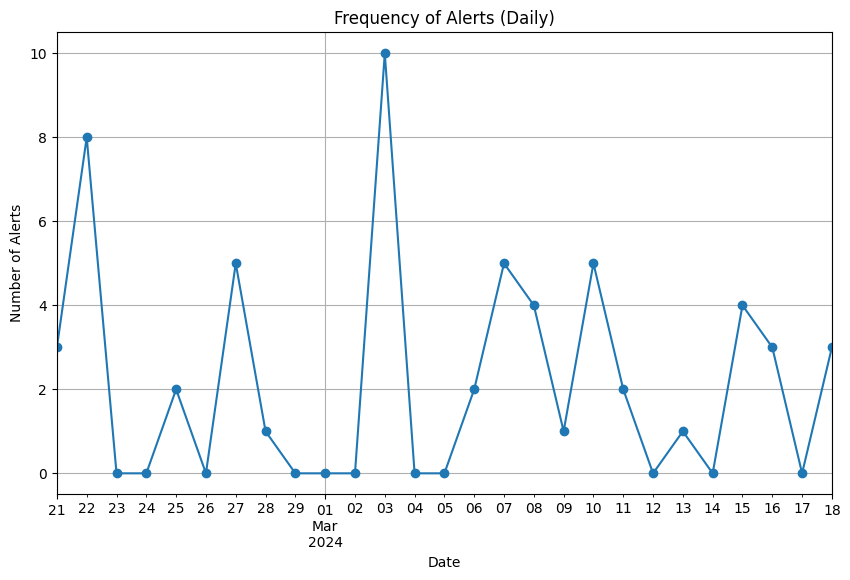

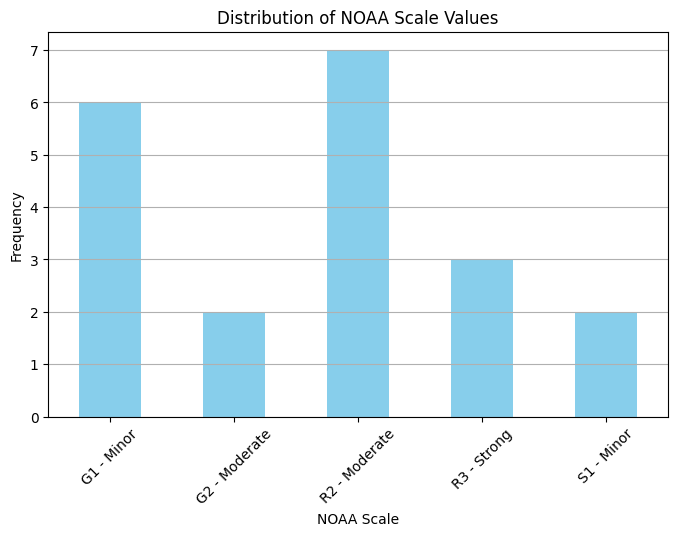

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the alerts data from the CSV file
alerts_df = pd.read_csv('alerts_data.csv')

# Convert 'Issue Datetime' column to datetime type
alerts_df['Issue Datetime'] = pd.to_datetime(alerts_df['Issue Datetime'])

# Temporal Analysis: Plot frequency of alerts over different time periods
plt.figure(figsize=(10, 6))
alerts_df.resample('D', on='Issue Datetime').size().plot(kind='line', marker='o')
plt.title('Frequency of Alerts (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Alerts')
plt.grid(True)
plt.show()

# Severity Analysis: Plot distribution of NOAA Scale values
plt.figure(figsize=(8, 5))
alerts_df['NOAA Scale'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of NOAA Scale Values')
plt.xlabel('NOAA Scale')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

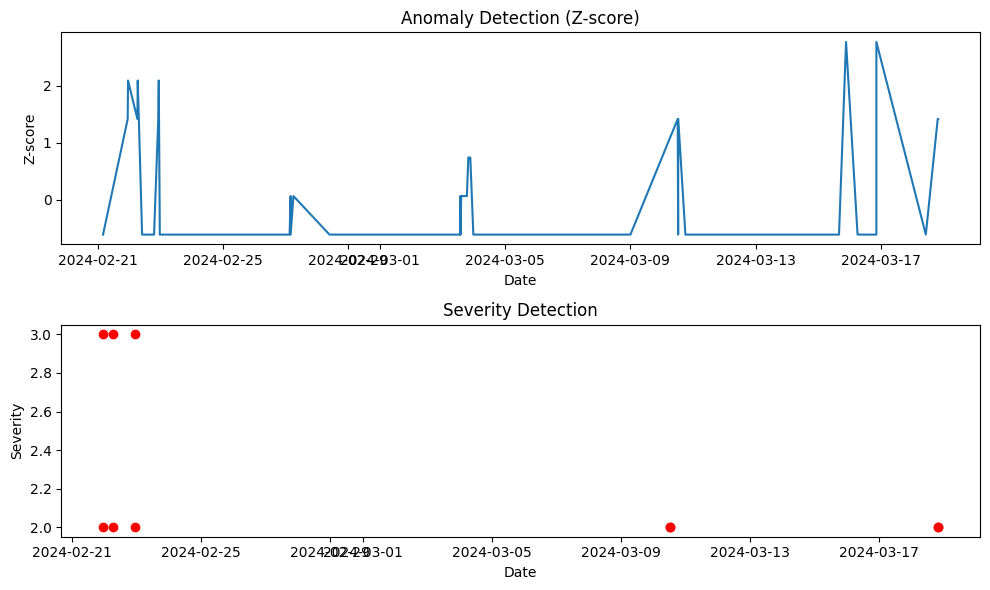

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the alerts data from the CSV file
alerts_df = pd.read_csv('alerts_data.csv')

# Convert 'Issue Datetime' column to datetime type
alerts_df['Issue Datetime'] = pd.to_datetime(alerts_df['Issue Datetime'])

# Anomaly Detection using Z-score
alerts_df['Z-score'] = (alerts_df['NOAA Scale'].astype('category').cat.codes - alerts_df['NOAA Scale'].astype('category').cat.codes.mean()) / alerts_df['NOAA Scale'].astype('category').cat.codes.std()

# Severity Detection
severity_levels = {
    'R1 - Minor': 1,
    'R2 - Moderate': 2,
    'R3 - Strong': 3,
    'R4 - Severe': 4,
    'R5 - Extreme': 5
}

alerts_df['Severity'] = alerts_df['NOAA Scale'].map(severity_levels)

# Plot anomaly detection
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(alerts_df['Issue Datetime'], alerts_df['Z-score'])
plt.title('Anomaly Detection (Z-score)')
plt.xlabel('Date')
plt.ylabel('Z-score')

# Plot severity detection
plt.subplot(2, 1, 2)
plt.plot(alerts_df['Issue Datetime'], alerts_df['Severity'], 'ro')
plt.title('Severity Detection')
plt.xlabel('Date')
plt.ylabel('Severity')

plt.tight_layout()
plt.show()
